# Jupyter notebook sample

In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

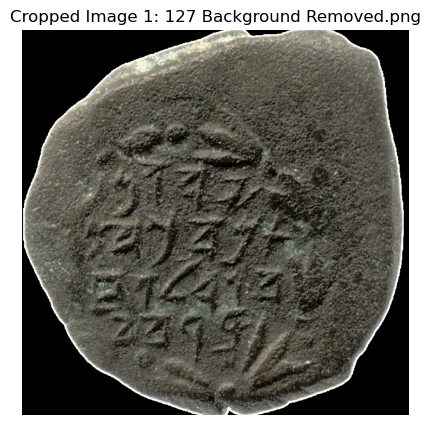

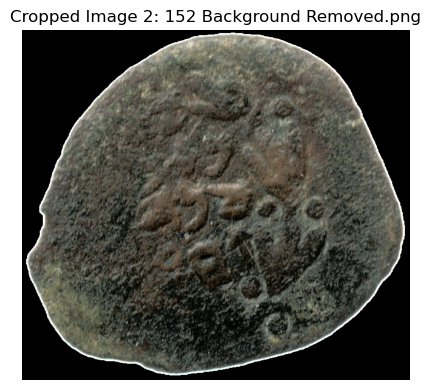

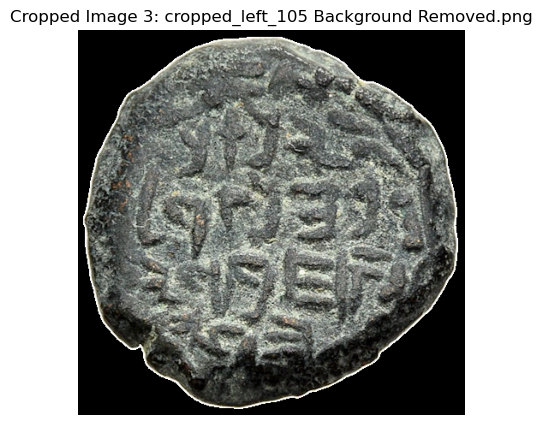

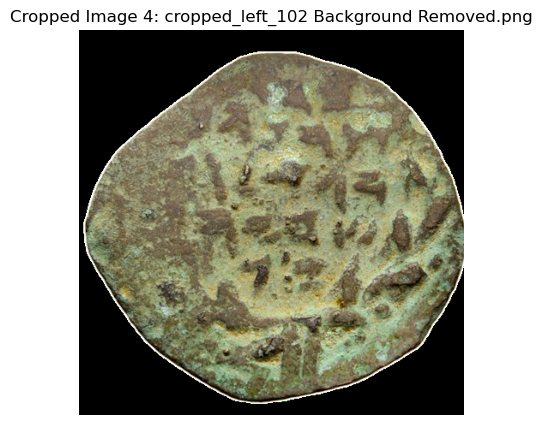

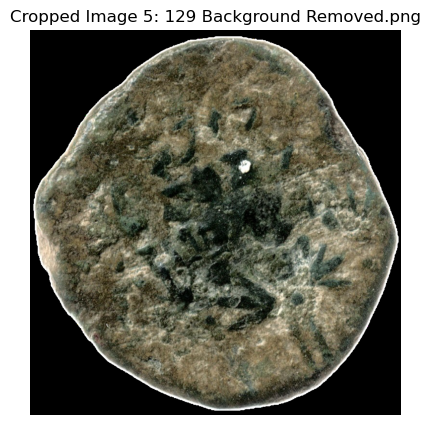

In [10]:
cropped_images_path = '/Users/nickbres/Downloads/HASMONEAN_PHOTOS_DATABASE/ALEXANDER_JANNEAUS_cropped'

# Function to load and display a sample of cropped images
def display_sample_images(path, num_samples=5):
    image_files = os.listdir(path)[:num_samples]
    for i, file in enumerate(image_files):
        img = cv2.imread(os.path.join(path, file))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying with matplotlib
        plt.figure(figsize=(5, 5))
        plt.imshow(img_rgb)
        plt.title(f"Cropped Image {i+1}: {file}")
        plt.axis("off")
        plt.show()

# Display sample images
display_sample_images(cropped_images_path)

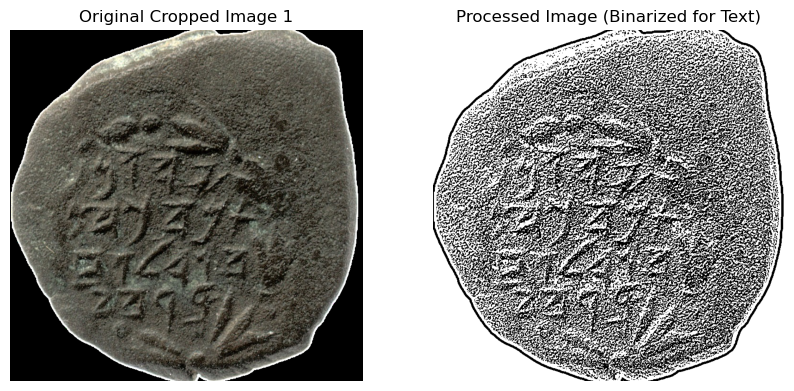

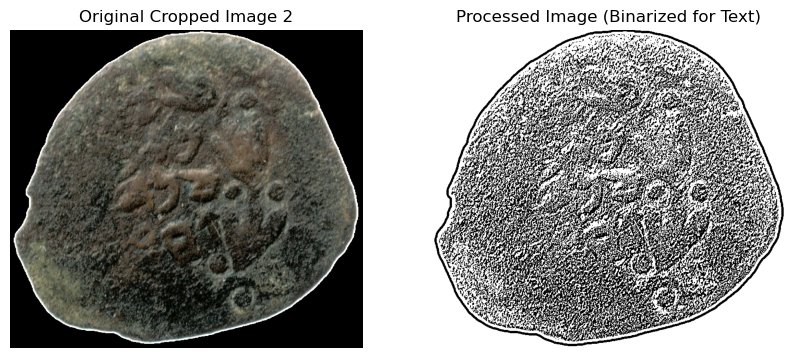

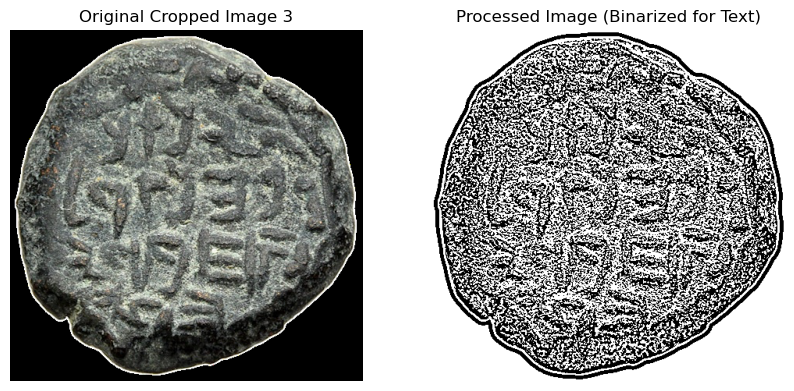

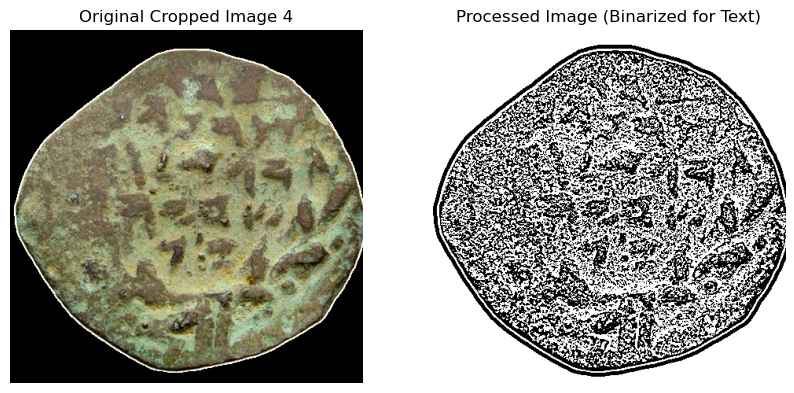

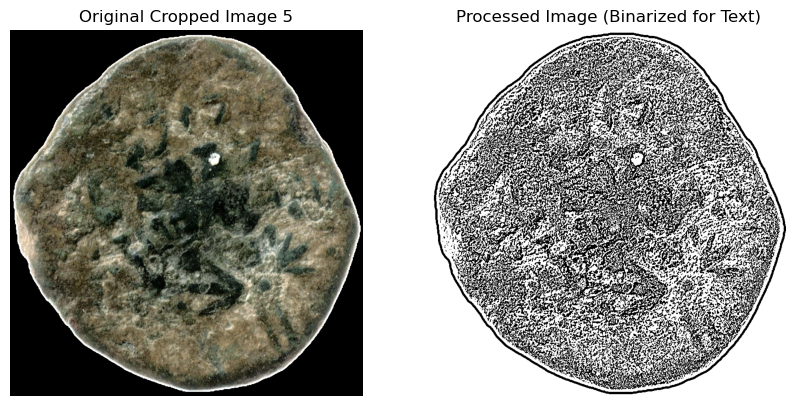

In [11]:
# Function to preprocess image for text recognition
def preprocess_image_for_text(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Enhance contrast using histogram equalization
    enhanced = cv2.equalizeHist(gray)

    # Apply adaptive thresholding to highlight text
    binary = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 11, 2)

    return binary

# Display processed versions of sample images
for i, file in enumerate(os.listdir(cropped_images_path)[:5]):
    img = cv2.imread(os.path.join(cropped_images_path, file))
    processed_img = preprocess_image_for_text(img)

    # Display the original and processed images side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Original Cropped Image {i+1}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(processed_img, cmap='gray')
    plt.title("Processed Image (Binarized for Text)")
    plt.axis("off")
    plt.show()

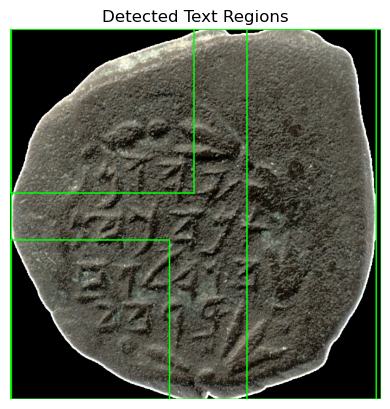

In [12]:
def extract_text_regions(image):
    # Preprocess for binarization
    binary = preprocess_image_for_text(image)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    text_regions = []

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        # Filter by size to ignore small artifacts
        if w > 10 and h > 10:
            text_region = image[y:y+h, x:x+w]
            text_regions.append(text_region)
            # Draw rectangles for visual confirmation
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display text regions on the original image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Detected Text Regions")
    plt.axis("off")
    plt.show()

    return text_regions

# Test on a sample cropped image
sample_image = cv2.imread(os.path.join(cropped_images_path, os.listdir(cropped_images_path)[0]))
extracted_regions = extract_text_regions(sample_image)